# Working with Titanic Dataset and ggplot2

In [1]:
library(readr)
library(dplyr)
library(ggplot2)
library(ggthemes)
library(gridExtra)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



In [2]:
# Load Data
titanic <- read_csv("Data/titanic_train.csv")
head(titanic)

Parsed with column specification:
cols(
  PassengerId = col_integer(),
  Survived = col_integer(),
  Pclass = col_integer(),
  Name = col_character(),
  Sex = col_character(),
  Age = col_double(),
  SibSp = col_integer(),
  Parch = col_integer(),
  Ticket = col_character(),
  Fare = col_double(),
  Cabin = col_character(),
  Embarked = col_character()
)


PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,NA,Q


### Convert Variables to factors
- Survived, Pclass, Sex, and Embarked

In [3]:
titanic <- titanic %>%
  mutate(Pclass = factor(Pclass), Survived = factor(Survived), Sex = factor(Sex), Embarked = factor(Embarked)) 

head(titanic)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,NA,Q


In [4]:
#str(titanic)

## Look at Survival Rate with a barplot
- Add some styling to the plot: Title and color
- More Poeple died than Survived (549:342)

In [5]:
table(titanic$Survived)


  0   1 
549 342 

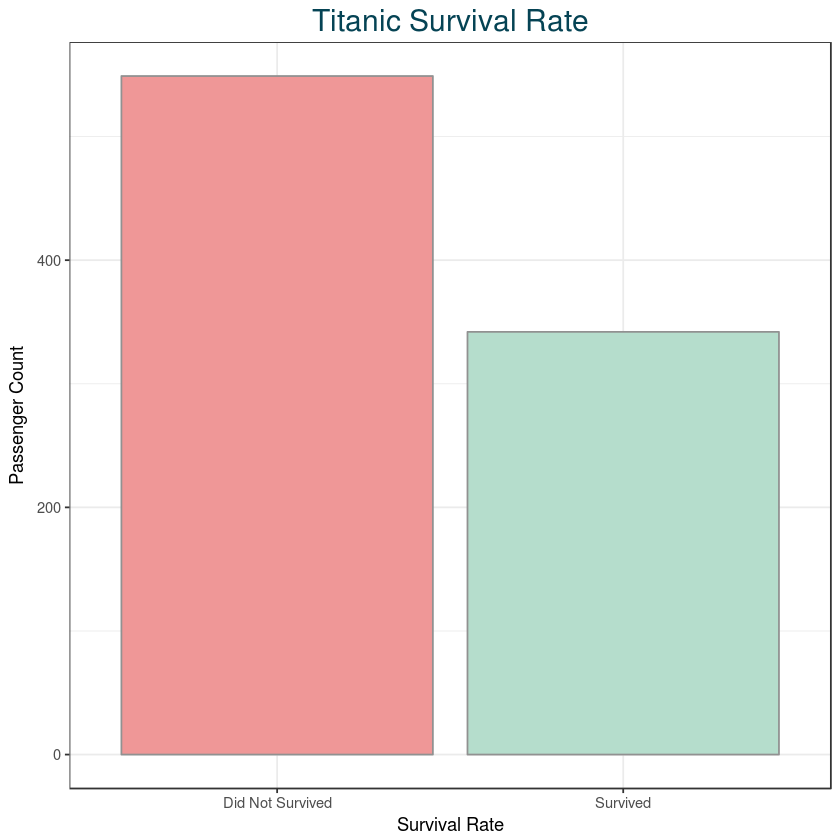

In [6]:
titanic %>%
  ggplot() +
  geom_bar(aes(x = Survived), color = "#919191", fill = c("#ef9797", "#b5ddcc")) +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size=18, colour = "#054354")) +
  ggtitle("Titanic Survival Rate") +
  scale_x_discrete(name= "Survival Rate", labels = c("Did Not Survived", "Survived")) +
  scale_y_continuous(name = "Passenger Count")

### Add Automatic Color based on Survived Variable
- Edit the Legends 

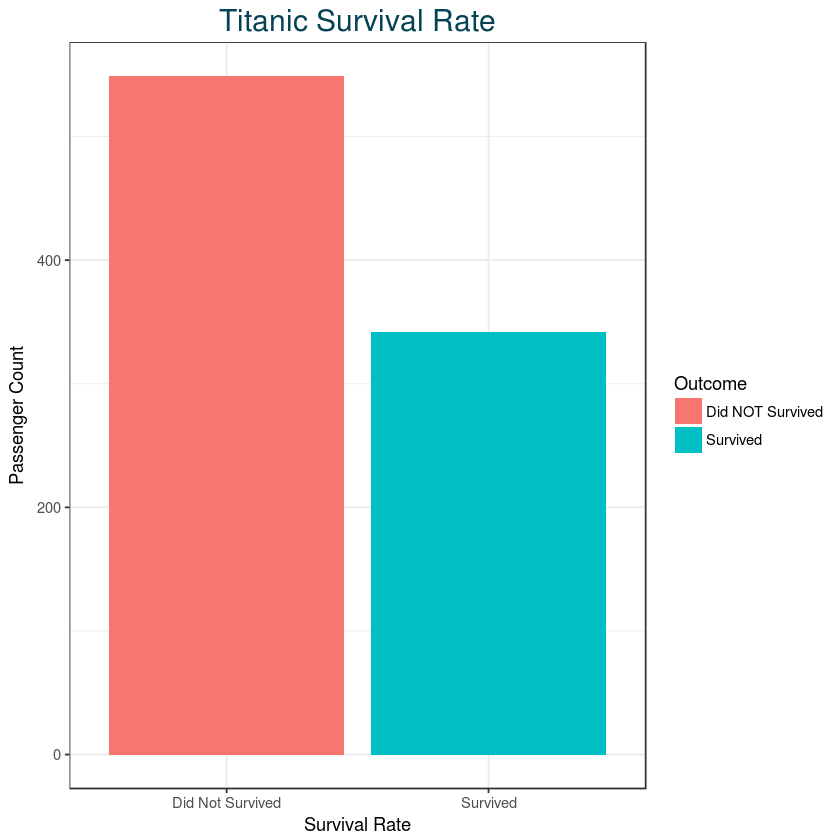

In [7]:
titanic %>%
  ggplot() +
  geom_bar(aes(x = Survived, fill = Survived)) +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size=18, colour = "#054354")) +
  ggtitle("Titanic Survival Rate") +
  scale_x_discrete(name= "Survival Rate", labels = c("Did Not Survived", "Survived")) +
  scale_y_continuous(name = "Passenger Count") +
  scale_fill_discrete(name = "Outcome", labels = c("Did NOT Survived", "Survived"))

### Barplot with proportion
- Using y=..count../sum(..count..) option
- More Poeple died than Survived (62% to 38%)

In [8]:
prop.table(table(titanic$Survived))


        0         1 
0.6161616 0.3838384 

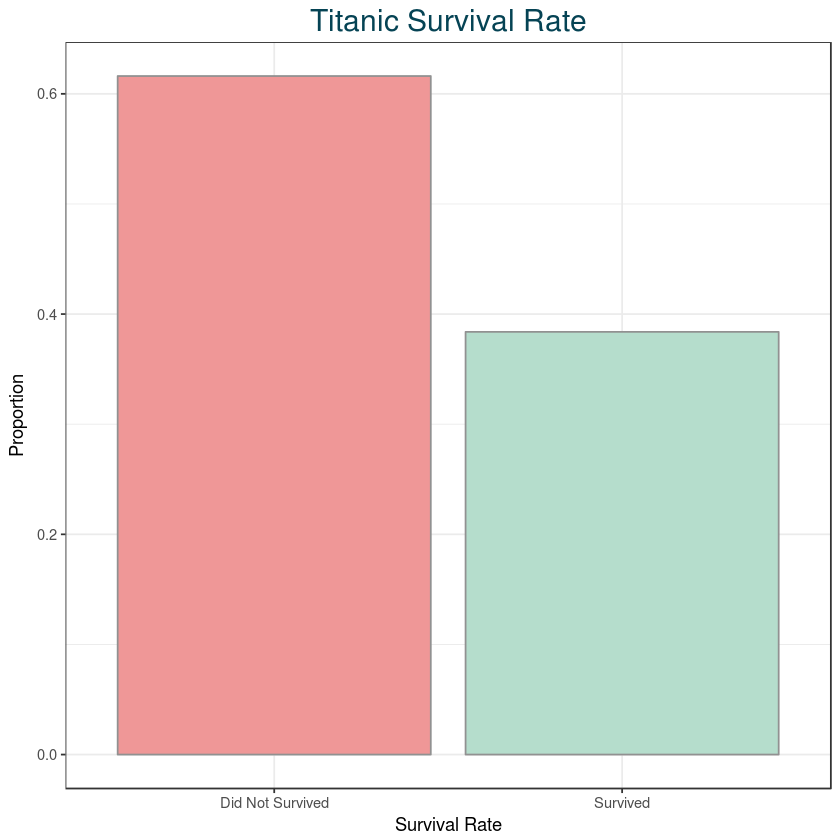

In [9]:
titanic %>%
  ggplot() +
  geom_bar(aes(x = Survived, y=..count../sum(..count..)), color = "#919191", fill = c("#ef9797", "#b5ddcc")) +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size=18, colour = "#054354")) +
  ggtitle("Titanic Survival Rate") +
  scale_x_discrete(name= "Survival Rate", labels = c("Did Not Survived", "Survived")) +
  scale_y_continuous(name = "Proportion") 

## Look at Survival Rate by Gender
- Use Gender on the x-axis
- Use Color to represent Survival on the Plot
- Total Females: 314 
  - 26% Did NOT Survive
  - 74% Survived
- Total Males: 577
  - 81% Did NOT Survive
  - 19% Survived

In [10]:
titanic %>%
  group_by(Sex) %>%
  summarise(Count = n())

Sex,Count
female,314
male,577


In [11]:
titanic %>%
  group_by(Sex, Survived) %>%
  summarise(Count = n()) %>%
  mutate(Percentage = round(Count/sum(Count)*100))

Sex,Survived,Count,Percentage
female,0,81,26
female,1,233,74
male,0,468,81
male,1,109,19


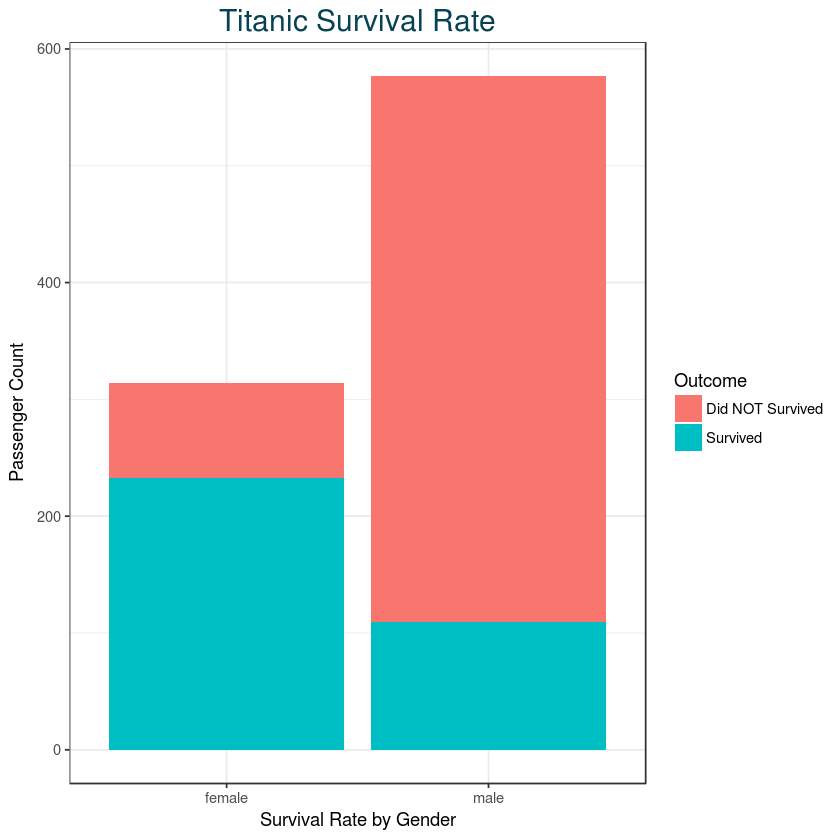

In [12]:
titanic %>%
  ggplot() +
  geom_bar(aes(x = Sex, fill = Survived)) +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size=18, colour = "#054354")) +
  ggtitle("Titanic Survival Rate") +
  scale_x_discrete(name= "Survival Rate by Gender") +
  scale_y_continuous(name = "Passenger Count") +
  scale_fill_discrete(name = "Outcome", labels = c("Did NOT Survived", "Survived"))  

## Look at Survival Rate by Ticket Class
- Use Pclass on the x-axis
- Use Color to represent Survival on the Plot
- 1st Class: 216
  - 37%  Did NOT Survive
  - 63% Survived
- 2nd Class: 184
  - 53%  Did NOT Survive
  - 47% Survived
- 3rd Class: 491
  - 76%  Did NOT Survive
  - 24% Survived

In [13]:
titanic %>%
  group_by(Pclass) %>%
  summarise(Count = n())

Pclass,Count
1,216
2,184
3,491


In [14]:
titanic %>%
  group_by(Pclass, Survived) %>%
  summarise(Count = n()) %>%
  mutate(Percentage = round(Count/sum(Count)*100))

Pclass,Survived,Count,Percentage
1,0,80,37
1,1,136,63
2,0,97,53
2,1,87,47
3,0,372,76
3,1,119,24


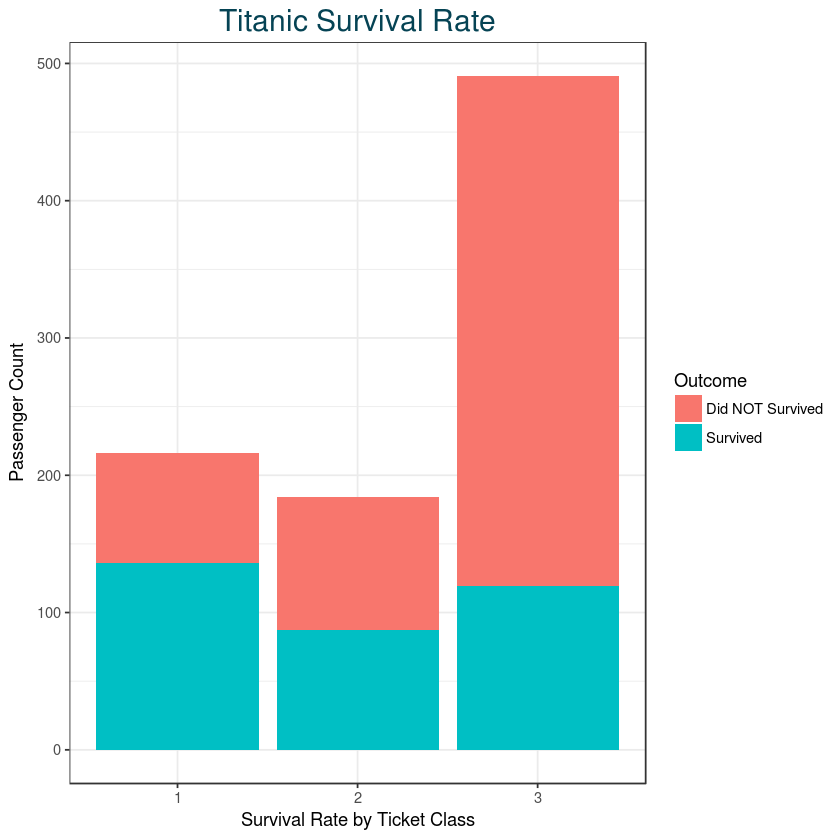

In [15]:
titanic %>%
  ggplot() +
  geom_bar(aes(x = Pclass, fill = Survived)) +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size=18, colour = "#054354")) +
  ggtitle("Titanic Survival Rate") +
  scale_x_discrete(name= "Survival Rate by Ticket Class") +
  scale_y_continuous(name = "Passenger Count") +
  scale_fill_discrete(name = "Outcome", labels = c("Did NOT Survived", "Survived"))  

## Look at Gender Survival Rate by Ticket Class
- Use facetting to look at Gender Survival by Pclass
- Use Color to represent Survival on the Plot

### Looking at Gender Proportion in each Class
- 1st Class:
  - Females: 44%
  - Males: 56%
- 2nd Class:
  - Females: 41%
  - Males: 59%
- 3rd Class:
  - Females: 29%
  - Males: 71%
- Higher ratio of Male to Female in 3rd Class compared to 1st and 2nd Class

In [16]:
titanic %>%
  group_by(Pclass, Sex) %>%
  summarise(Count = n()) %>%
  mutate(Percentage = round(Count/sum(Count)*100))

Pclass,Sex,Count,Percentage
1,female,94,44
1,male,122,56
2,female,76,41
2,male,108,59
3,female,144,29
3,male,347,71


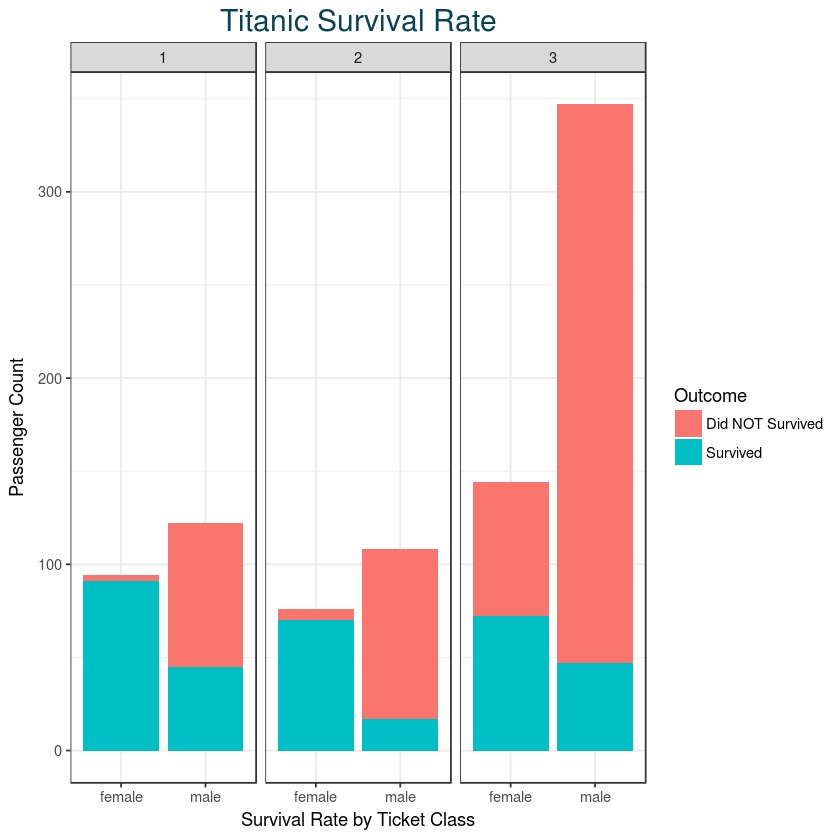

In [17]:
# Using facet_wrap(~ Pclass)
titanic %>%
  ggplot() +
  geom_bar(aes(x = Sex, fill = Survived)) +
  facet_wrap(~ Pclass) +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size=18, colour = "#054354")) +
  ggtitle("Titanic Survival Rate") +
  scale_x_discrete(name= "Survival Rate by Ticket Class") +
  scale_y_continuous(name = "Passenger Count") +
  scale_fill_discrete(name = "Outcome", labels = c("Did NOT Survived", "Survived"))  

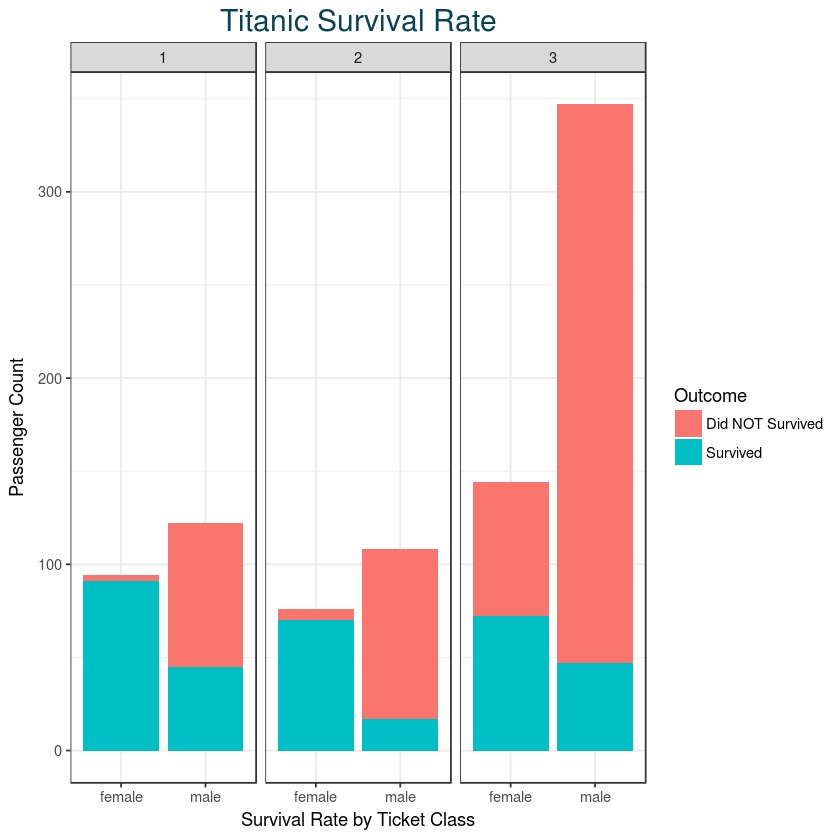

In [18]:
# Same as above using facet_grid(. ~ Pclass)
titanic %>%
  ggplot() +
  geom_bar(aes(x = Sex, fill = Survived)) +
  facet_grid(. ~ Pclass) +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size=18, colour = "#054354")) +
  ggtitle("Titanic Survival Rate") +
  scale_x_discrete(name= "Survival Rate by Ticket Class") +
  scale_y_continuous(name = "Passenger Count") +
  scale_fill_discrete(name = "Outcome", labels = c("Did NOT Survived", "Survived"))

#### Looking at Gender Proportion in each Class and Survival
- 1st Class:
  - Females: 
    - 3% Did Not Survive
    - 97% Survived
  - Males:
    - 63% Did Not Survive
    - 37% Survived
- 2nd Class:
  - Females:
    - 8% Did Not Survive
    - 92% Survived
  - Males:
    - 84% Did Not Survive
    - 16% Survived
- 3rd Class:
  - Females:
    - 50% Did Not Survive
    - 50% Survived
  - Males:
    - 86% Did Not Survive
    - 14% Survived

In [19]:
titanic %>%
  group_by(Pclass, Sex, Survived) %>%
  summarise(Count = n()) %>%
  mutate(Percentage = round(Count/sum(Count)*100))

Pclass,Sex,Survived,Count,Percentage
1,female,0,3,3
1,female,1,91,97
1,male,0,77,63
1,male,1,45,37
2,female,0,6,8
2,female,1,70,92
2,male,0,91,84
2,male,1,17,16
3,female,0,72,50
3,female,1,72,50


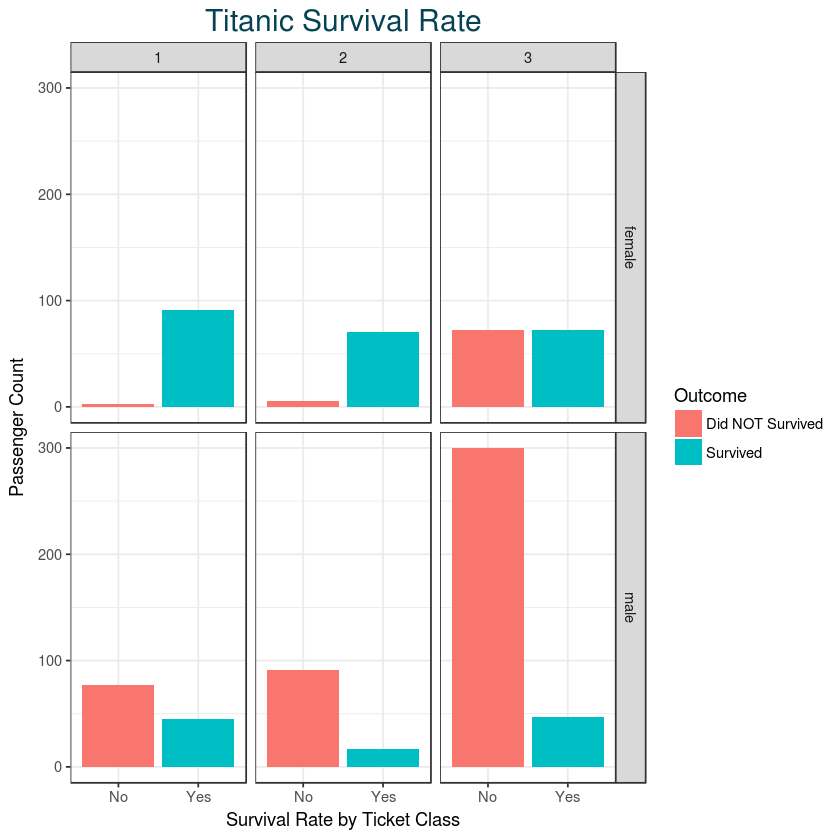

In [20]:
# Using facet_grid(Sex ~ Pclass) to separate Gender and Survival
titanic %>%
  ggplot() +
  geom_bar(aes(x = Survived, fill = Survived)) +
  facet_grid(Sex ~ Pclass) +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size=18, colour = "#054354")) +
  ggtitle("Titanic Survival Rate") +
  scale_x_discrete(name= "Survival Rate by Ticket Class", labels = c("No", "Yes")) +
  scale_y_continuous(name = "Passenger Count") +
  scale_fill_discrete(name = "Outcome", labels = c("Did NOT Survived", "Survived"))  